# CAM (Class Activation Mapping)

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import models
import torchvision.utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prepare Data

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = dsets.ImageFolder('./data/dogcat/', train_transform)
train_loader = DataLoader(train_data, batch_size=2)

In [4]:
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

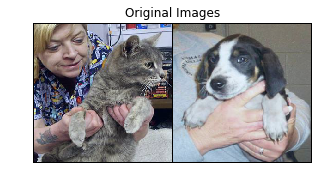

In [5]:
train_iter = iter(train_loader)
images, labels = train_iter.next()

imshow(images, "Original Images")

In [6]:
# Bring the label information of ImageNet.
labels = torch.load("./data/imagenet_label.pt")

## 2. Load Model

In [7]:
# Check an architecture of GoogLeNet.
model = models.googlenet(pretrained=True).cuda()
model._modules.keys()

odict_keys(['conv1', 'maxpool1', 'conv2', 'conv3', 'maxpool2', 'inception3a', 'inception3b', 'maxpool3', 'inception4a', 'inception4b', 'inception4c', 'inception4d', 'inception4e', 'maxpool4', 'inception5a', 'inception5b', 'avgpool', 'dropout', 'fc'])

## 3. CAM

In [8]:
from CAM import CAM
cam, pre = CAM(model, images,
               last_conv_name='inception5b', fc_name='fc', 
               label=None, normalize=True, resize=True)

Predicted :  tabby, tabby cat & Walker hound, Walker foxhound


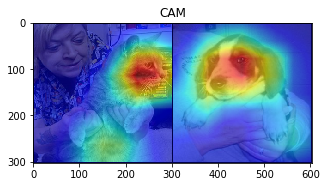

In [9]:
print("Predicted : ", " & ".join([labels[i.item()] for i in pre]))

cam = cam.cpu()
fig = plt.figure(figsize = (5, 15))

# Draw input images
img = torchvision.utils.make_grid(images, normalize=True)
npimg = img.numpy()
plt.imshow(np.transpose(npimg,(1,2,0)))

# Overlay CAM
imgcam = torchvision.utils.make_grid(cam, normalize=False)
npcam = imgcam[0,:,:].numpy()
plt.imshow(npcam, cmap='jet', alpha=0.6)

plt.title("CAM")
plt.show()